In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("/kaggle/input/human-decision-fatigue-behavioral-dataset/human_decision_fatigue_dataset.csv")

In [3]:
df.head()

,Hours_Awake,Decisions_Made,Task_Switches,Avg_Decision_Time_sec,Sleep_Hours_Last_Night,Time_of_Day,Caffeine_Intake_Cups,Stress_Level_1_10,Error_Rate,Cognitive_Load_Score,Decision_Fatigue_Score,Fatigue_Level,System_Recommendation
0,7,28,7,2.30,5.8,Evening,0,2.4,0.000,2.6,15.6,Low,Continue
1,15,77,22,3.65,4.5,Afternoon,3,1.9,0.143,4.5,97.3,High,Take Break
2,11,57,23,3.67,6.8,Night,2,2.1,0.000,4.1,55.4,Moderate,Slow Down
3,8,39,10,2.39,5.3,Afternoon,1,1.0,0.000,2.3,29.7,Low,Continue
4,7,46,16,3.05,8.2,Night,1,2.8,0.000,3.9,19.1,Low,Continue


In [4]:
df.shape

(25000, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Hours_Awake             25000 non-null  int64  
 1   Decisions_Made          25000 non-null  int64  
 2   Task_Switches           25000 non-null  int64  
 3   Avg_Decision_Time_sec   25000 non-null  float64
 4   Sleep_Hours_Last_Night  25000 non-null  float64
 5   Time_of_Day             25000 non-null  object 
 6   Caffeine_Intake_Cups    25000 non-null  int64  
 7   Stress_Level_1_10       25000 non-null  float64
 8   Error_Rate              25000 non-null  float64
 9   Cognitive_Load_Score    25000 non-null  float64
 10  Decision_Fatigue_Score  25000 non-null  float64
 11  Fatigue_Level           25000 non-null  object 
 12  System_Recommendation   25000 non-null  object 
dtypes: float64(6), int64(4), object(3)
memory usage: 2.5+ MB


In [6]:
df.isnull().sum()

Hours_Awake               0
Decisions_Made            0
Task_Switches             0
Avg_Decision_Time_sec     0
Sleep_Hours_Last_Night    0
Time_of_Day               0
Caffeine_Intake_Cups      0
Stress_Level_1_10         0
Error_Rate                0
Cognitive_Load_Score      0
Decision_Fatigue_Score    0
Fatigue_Level             0
System_Recommendation     0
dtype: int64

In [7]:
df.describe()

,Hours_Awake,Decisions_Made,Task_Switches,Avg_Decision_Time_sec,Sleep_Hours_Last_Night,Caffeine_Intake_Cups,Stress_Level_1_10,Error_Rate,Cognitive_Load_Score,Decision_Fatigue_Score
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,9.088280,45.433080,13.623480,2.918346,6.085956,1.897240,2.202736,0.031877,3.365784,40.579280
std,4.928093,25.611583,8.521595,0.942644,1.114586,1.430483,1.329868,0.057457,1.729092,36.704221
min,1.000000,0.000000,0.000000,0.500000,2.000000,0.000000,1.000000,0.000000,0.600000,0.000000
25%,5.000000,23.000000,7.000000,2.270000,5.300000,1.000000,1.000000,0.000000,1.900000,0.000000
50%,9.000000,45.000000,13.000000,2.910000,6.100000,2.000000,1.800000,0.000000,3.200000,34.650000
75%,13.000000,67.000000,20.000000,3.550000,6.900000,3.000000,3.100000,0.045000,4.600000,74.200000
max,17.000000,117.000000,48.000000,6.800000,9.000000,6.000000,8.700000,0.359000,9.700000,100.000000


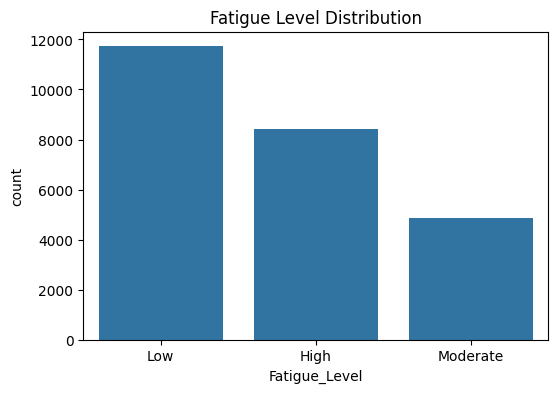

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x="Fatigue_Level", data=df)
plt.title("Fatigue Level Distribution")
plt.show()

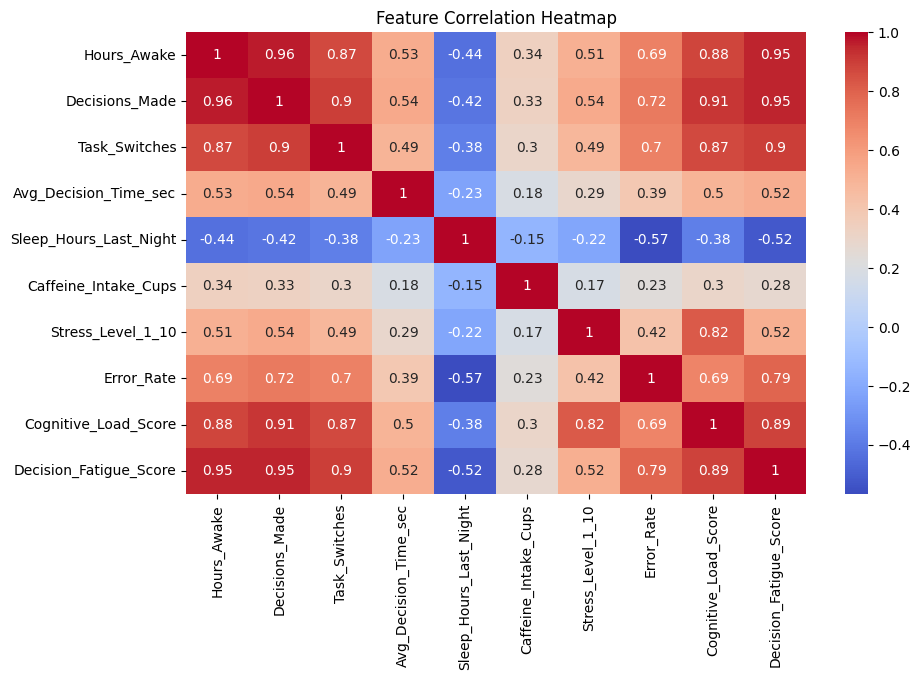

In [9]:
plt.figure(figsize=(10,6))
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

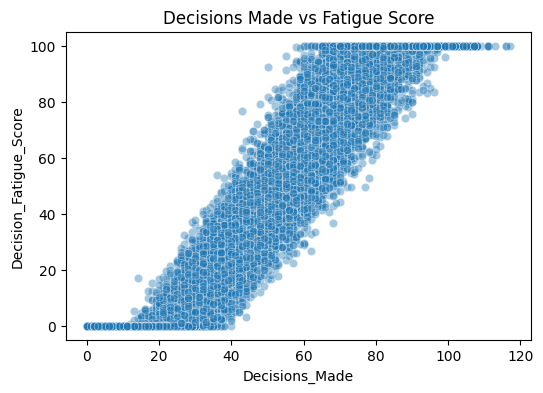

In [10]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Decisions_Made", y="Decision_Fatigue_Score", data=df, alpha=0.4)
plt.title("Decisions Made vs Fatigue Score")
plt.show()

In [11]:
le_fatigue = LabelEncoder()
le_time = LabelEncoder()

df["Fatigue_Level"] = le_fatigue.fit_transform(df["Fatigue_Level"])
df["Time_of_Day"] = le_time.fit_transform(df["Time_of_Day"])

In [12]:
X = df.drop(columns=["Fatigue_Level", "System_Recommendation"])
y = df["Fatigue_Level"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [14]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=10,
    random_state=42
)

model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, n_estimators=150, random_state=42)

In [16]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1681
           1       1.00      1.00      1.00      2346
           2       1.00      1.00      1.00       973

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



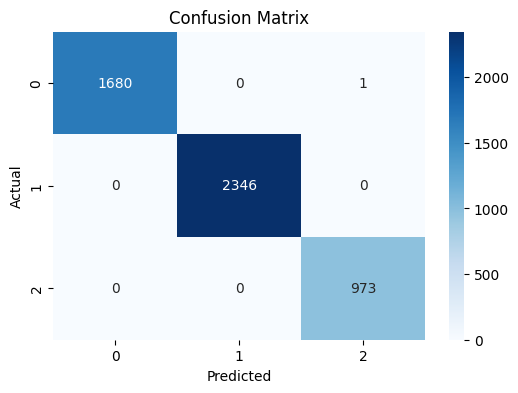

In [17]:
plt.figure(figsize=(6,4))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True, fmt="d", cmap="Blues"
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Conclusion

The classification model demonstrates near-perfect performance, achieving an accuracy of 99.98% with precision, recall, and F1-scores of 1.00 across all fatigue classes. This indicates that the selected behavioral, cognitive, and lifestyle features provide strong discriminatory power for identifying different levels of decision fatigue.

The results confirm that decision fatigue can be reliably predicted using measurable indicators such as decision volume, task switching, sleep duration, stress, and error rate. The consistent performance across all classes suggests that the dataset is well-structured and that the underlying feature relationships are logically coherent.

Although the model performs exceptionally well on this synthetic dataset, the results primarily reflect the clarity and consistency of the data generation process. Future work may involve introducing additional variability or validating the approach on real-world data to assess robustness under noisier conditions.

Overall, this study establishes a strong baseline for decision fatigue detection and provides a reliable foundation for further research in human performance modeling and cognitive workload analysis.